In [1]:
import sys
sys.path.append('./src/')
import numpy as np
from propagation import Propagation
from backpropagation import BackPropagation
import activation
import loss_fn
from activation import ReLU
from loss_fn import MSE
from propagation import Propagation
from sklearn.datasets import load_iris, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# 多クラス分類
data_iris = load_iris()
data, ground_truth = data_iris.data, data_iris.target
ground_truth = ground_truth.reshape(-1, 1)
scaler = StandardScaler()
data = scaler.fit_transform(data)

print(f"data is : {data[1:5, :]}\n")
print(f"ground_truth is: {ground_truth[1:5]}\n")
print(f"data shape is :{data.shape}")
print(f"ground_truth shape is :{ground_truth.shape}")

data is : [[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

ground_truth is: [[0]
 [0]
 [0]
 [0]]

data shape is :(150, 4)
ground_truth shape is :(150, 1)


In [4]:
# softmax関数を実装する
layers = [10, 1]
model = BackPropagation(data=data,  ground_truth=ground_truth, layers=layers, activation=ReLU(), loss_fn=MSE())

model.fit(step_size = 1e-2, threshold=1e-4, max_itr=10000)
pred = model.predict(data=data)

#print(f"\npred: {pred}")

Epoch: 10000, loss: 2.6318
最大エポック数に到達しました。


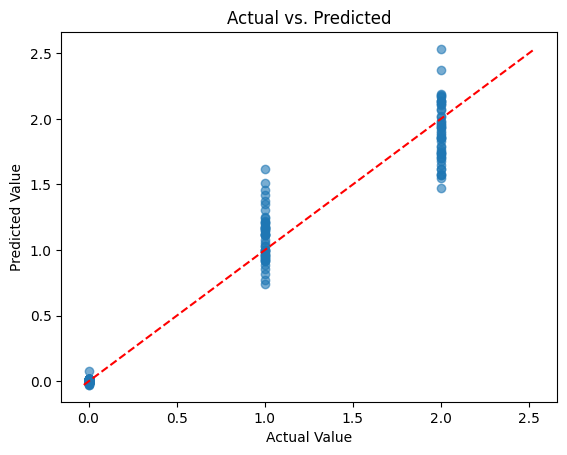

In [5]:
# y_true, y_pred はどちらも shape=(n_samples,) または (n_samples,1)
y_true = ground_truth.flatten()
y_pred = model.predict(data)
y_pred = y_pred.reshape(-1, 1).flatten()  # あなたのモデルの予測出力

plt.figure()
plt.scatter(y_true, y_pred, alpha=0.6)
# 理想ライン y=x も描く
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted")
plt.show()

In [7]:
diab = load_diabetes()
X, y = diab.data, diab.target
y = y.reshape(-1, 1)
scaler_X = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler.fit_transform(y)

print(f"data shape is :{X_scaled.shape}")
print(f"ground_truth shape is :{y_scaled.shape}")
print(f"data is : {X_scaled[1:5, :]}\n")
print(f"ground_truth is: {y_scaled[1:5]}\n")

data shape is :(442, 10)
ground_truth shape is :(442, 1)
data is : [[-0.03956713 -0.93853666 -1.08218016 -0.55350458 -0.17762425 -0.40288615
   1.56441355 -0.83030083 -1.43658851 -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 -0.1192138  -0.95867356 -0.71889748
  -0.68024452 -0.05449919  0.06015558 -0.54515416]
 [-1.87244107 -0.93853666 -0.24377122 -0.77064997  0.25629203  0.52539714
  -0.75764652  0.72130245  0.47698252 -0.19682291]
 [ 0.11317236 -0.93853666 -0.76494435  0.45984057  0.08272552  0.32789006
   0.17117751 -0.05449919 -0.67250161 -0.98056821]]

ground_truth is: [[-1.00165882]
 [-0.14457991]
 [ 0.69951294]
 [-0.22249618]]



In [17]:
layers = [5, 5, 1]
model = BackPropagation(data=X_scaled,  ground_truth=y_scaled, layers=layers, activation=ReLU(), loss_fn=MSE())
model.fit(step_size = 1e-4, threshold=1e-4, max_itr=100000)
pred = model.predict(data=X_scaled)

Epoch: 100000, loss: 115.4231
最大エポック数に到達しました。


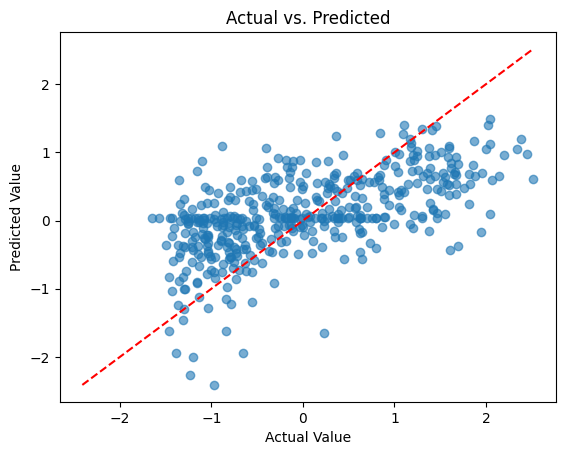

In [12]:
# y_true, y_pred はどちらも shape=(n_samples,) または (n_samples,1)
y_true = y_scaled.flatten()
y_pred = model.predict(X_scaled)
y_pred = y_pred.reshape(-1, 1).flatten()  # あなたのモデルの予測出力

plt.figure()
plt.scatter(y_true, y_pred, alpha=0.6)
# 理想ライン y=x も描く
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted")
plt.show()